In [145]:
import numpy as np
import cv2
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (12,6)

In [146]:
def show_image(image):
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()

## Histogram Equalization based on this formula:
$$h(v)=\mathrm {round} \left({\frac {cdf(v)-cdf_{min}}{(M\times N)-cdf_{min}}}\times (L-1)\right)$$

Where L is the total number of grey levels in the image, $cdf$ is the cumulative distribution function of the image, $cdf_{min}$ is the minimum non-zero value of the cumulative distribution function and $M\times N$ is total number of pixels in the image.

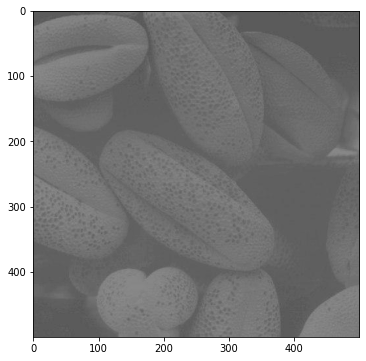

In [147]:
image = cv2.imread('temp.jpg', 0)
show_image(image)

In [148]:
image.shape, image.min(), image.max()

((500, 500), 81, 144)

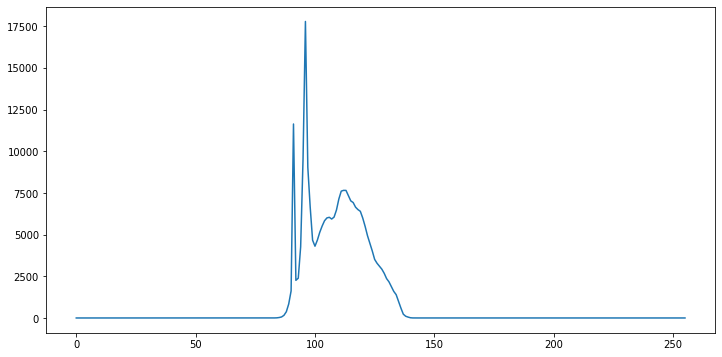

In [149]:
plt.plot(cv2.calcHist([image], [0], None, [256], [0, 256])) 
plt.show()

In [150]:
def normalize_histogram(image):
    unique, counts = np.unique(image, return_counts=True)
    pdf = dict(zip(unique, counts))
    cdf = dict(zip(list(pdf.keys()), np.cumsum(list(pdf.values()))))
    cdf_min = pdf[image.min()]
    total_pixels = image.shape[0] * image.shape[1]
    norm_histo = {i: round(255 * (cdf[i] - cdf_min) / (total_pixels - cdf_min)) for i in cdf.keys()}
    
    new_image = np.zeros((image.shape), dtype="uint8")
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i][j] = norm_histo[image[i][j]]
    return new_image

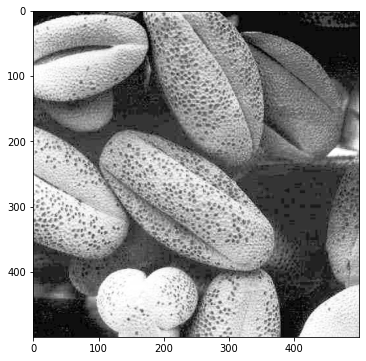

In [151]:
new = normalize_histogram(image)
show_image(new)

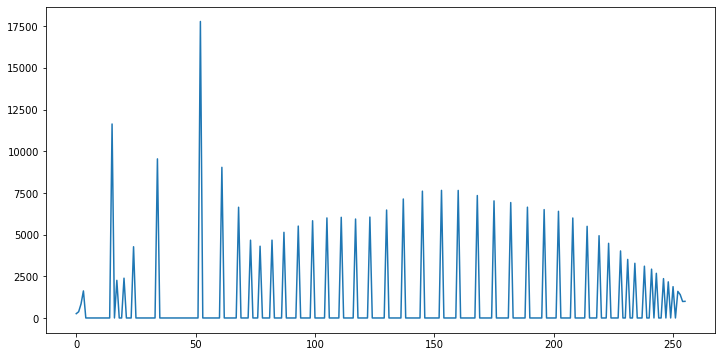

In [152]:
plt.plot(cv2.calcHist([new], [0], None, [256], [0, 256]))
plt.show()